In [41]:
from __future__ import print_function
import keras
import numpy as np
import h5py as h5py
from keras.datasets import mnist
from keras.layers import Dense, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.models import Sequential,load_model
import matplotlib.pylab as plt

In [89]:
#The training batch size, how many output neurons we will need and the number of times we will train
batchSize = 128
numClasses = 10
epochs = 6

In [62]:
#The dimensions of the mnist data set
x=28
y=28

In [63]:
#load the mnist dataset and split it into a training and testing set
(xTrain,yTrain),(xTest,yTest)=mnist.load_data()

In [64]:
#
xTrain=xTrain.reshape(xTrain.shape[0],x,y,1)
xTest=xTest.reshape(xTest.shape[0],x,y,1)
inputShape=(x,y,1)

In [65]:
#Convert datatypes
xTrain=xTrain.astype("float32")
yTrain=yTrain.astype("float32")


In [66]:
#Simple normalization
xTrain /= 255
xTest /= 255

In [67]:
print(xTrain.shape)
print(xTrain.shape[0])
print(xTest.shape[0])

(60000, 28, 28, 1)
60000
10000


In [68]:
yTrain=keras.utils.to_categorical(yTrain, numClasses)
yTest=keras.utils.to_categorical(yTest, numClasses)

In [69]:
#Create the network object
model=Sequential()

In [70]:
model.add(Conv2D(32, 
                 kernel_size=(5, 5), 
                 strides=(1, 1), 
                 activation='relu', 
                 input_shape=inputShape))

In [71]:
model.add(MaxPooling2D(pool_size=(2,2),
                      strides=(2,2)))

In [72]:
model.add(Conv2D(64,
                 (5,5),
                activation="relu"))

In [73]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [74]:
model.add(Flatten())

In [75]:
model.add(Dense(1000,
                activation="relu"))

In [76]:
model.add(Dense(numClasses, activation='softmax'))

In [77]:
model.compile(loss=keras.losses.categorical_crossentropy,
             optimizer=keras.optimizers.Adam(),
             metrics=["accuracy"])

In [78]:
class AccuracyHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.acc = []

    def on_epoch_end(self, batch, logs={}):
        self.acc.append(logs.get('acc'))

In [79]:
history = AccuracyHistory()

In [90]:
model.fit(xTrain, yTrain,
          batch_size=batchSize,
          epochs=epochs,
          verbose=1,
          validation_data=(xTest, yTest),
          callbacks=[history])

Train on 60000 samples, validate on 10000 samples
Epoch 1/6
60000/60000 [==============================] - 117s 2ms/step - loss: 0.0042 - acc: 0.9986 - val_loss: 2.3772 - val_acc: 0.1622
Epoch 2/6
60000/60000 [==============================] - 118s 2ms/step - loss: 0.0054 - acc: 0.9983 - val_loss: 2.4078 - val_acc: 0.1627
Epoch 3/6
60000/60000 [==============================] - 118s 2ms/step - loss: 0.0031 - acc: 0.9991 - val_loss: 2.3776 - val_acc: 0.1667
Epoch 4/6
60000/60000 [==============================] - 118s 2ms/step - loss: 0.0034 - acc: 0.9990 - val_loss: 2.3970 - val_acc: 0.1651
Epoch 5/6
60000/60000 [==============================] - 118s 2ms/step - loss: 0.0034 - acc: 0.9991 - val_loss: 2.3762 - val_acc: 0.1609
Epoch 6/6
60000/60000 [==============================] - 119s 2ms/step - loss: 0.0047 - acc: 0.9985 - val_loss: 2.3889 - val_acc: 0.1613


Test loss: 2.388891212463379
Test accuracy: 0.1613


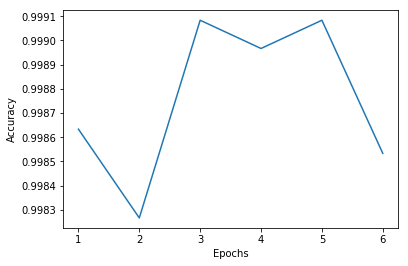

In [91]:
score = model.evaluate(xTest, yTest, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
plt.plot(range(1, epochs+1), history.acc)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

In [92]:
model.save("model_epoch6.h5")

In [93]:
del model

In [94]:
model=load_model("model_epoch6.h5")

In [100]:

test=xTrain[6]
print(yTrain[6])
test=np.expand_dims(test,axis=0)
print(np.argmax(model.predict(test)))

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
1
